# AdventureWorks Försäljning analys

I denna analys undersöker vi AdventureWorks-databasen för att besvara affärsfrågor som exempelvis:
- Produktkategorier och deras försäljning
- Försäljningstrender över tid
- Regional Försäljning

Använder SQL för att hämta data och Python för visualisering och analys.

In [ ]:
import pandas as pd
import numpy as np
from src.report import SqlReport
from src.viz import (
    viz_products_per_category,
    viz_total_sell_per_category,
    
)
from src.metrics import(
    year_month_combined,
)
import matplotlib.pyplot as plt

sql_report = SqlReport()

# Mall

## Title

### Affärsfråga


### Metod
Jag använder tabellerna:
-   
-   
-   

Steg:
1.   
2.   
3. 

In [ ]:
query_1 = """
SELECT TOP 5 *
FROM Person.person
"""
query_1_df = sql_report.query_df(query_1)
query_1_df.head()

## 1. Antal produkter per kategori

### Affärsfråga
Hur många produkter finns i varje kategori?

### Metod
Jag använder tabellerna:
- Production.ProductCategory  
- Production.ProductSubcategory  
- Production.Product  

Steg:
1. JOIN mellan kategorier, underkategorier och produkter  
2. Räkna DISTINCT ProductID per kategori  
3. Returnera resultatet som en DataFrame och visualisera med ett vertikalt stapeldiagram

In [ ]:
query_category_total = """
SELECT

    pc.Name as Productname,
    COUNT(DISTINCT(p.ProductID)) as amount

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
GROUP BY pc.Name
"""
query_category_total_df = sql_report.query_df(query_category_total)
viz_products_per_category(query_category_total_df)

## Insikter – Antal produkter per kategori

Components är den största kategorin med 134 produkter, följt av Bikes med 97. 
Accessories är den minsta kategorin med endast 29 produkter.

Detta tyder på att företaget har ett brett sortiment inom Components och Bikes, 
medan Accessories är ett betydligt mindre område och kan vara en potentiell utvecklingsmöjlighet.


## 2: Försäljning per produktkategori

### Affärsfråga
Vilka produkterkategorier säljer mest.

### Metod
Jag använder tabellerna:
-   Production.ProductCategory
-   Production.ProductSubcategory
-   Production.Product
-   Sales.SalesOrderDetail

Steg:
1. JOIN mellan Category, SubCategory, Product och SalesDetail
2. Räknar total försäljning per category
3. return i en Dataframe med productname och revenue och gör en visualisering med ett horisontellt stapeldiagram

In [ ]:

query_sell_per_category ="""
SELECT

    pc.Name as Productname,
    SUM(sod.LineTotal) as Revenue

FROM Production.ProductCategory as pc
INNER JOIN Production.ProductSubcategory as psc ON  pc.ProductCategoryID = psc.ProductCategoryID
INNER JOIN Production.Product as p on psc.ProductSubcategoryID = p.ProductSubcategoryID 
INNER JOIN Sales.SalesOrderDetail as sod on p.ProductID = sod.ProductID
GROUP BY pc.Name
ORDER BY SUM(sod.LineTotal) DESC
"""
query_sell_per_category_df = sql_report.query_df(query_sell_per_category)
viz_total_sell_per_category(query_sell_per_category_df)

## Insikter – Hur mycket pengar kommer in per kategori

Bikes står för 94 651 172 (≈ 86%) i försäljning (sales), components för 11 802 593(≈ 10.7%) medans cloth 2 120 542(≈ 1.9%) och accessories 1 272 072(≈ 1.16%) för en total försäljning på 109 846 379

Bör lägga fokus på Bikes sales och hålla ögonen på components.

## 3: Försäljningstrend över tid

### Affärsfråga

Hur har försäljningen utvecklats över tid?

### Metod
Jag använder tabellerna:
-   Sales.SalesOrderHeader

Steg:
1.   
2.   
3. 

In [ ]:
query_sell_per_month ="""
SELECT

    YEAR(soh.OrderDate) as OrderYear,
    MONTH(soh.OrderDate) as OrderMonth,
    SUM(sod.LineTotal) as Revenue

FROM Sales.SalesOrderHeader as soh
INNER JOIN Sales.SalesOrderDetail as sod on soh.SalesOrderID = sod.SalesOrderID
GROUP BY YEAR(soh.OrderDate), MONTH(soh.OrderDate)
ORDER BY  YEAR(soh.OrderDate), MONTH(soh.OrderDate) ASC
"""
query_sell_per_month_df = sql_report.query_df(query_sell_per_month)
query_sell_per_month_df.head()
simple_df = year_month_combined(query_sell_per_month_df)
simple_df.head()


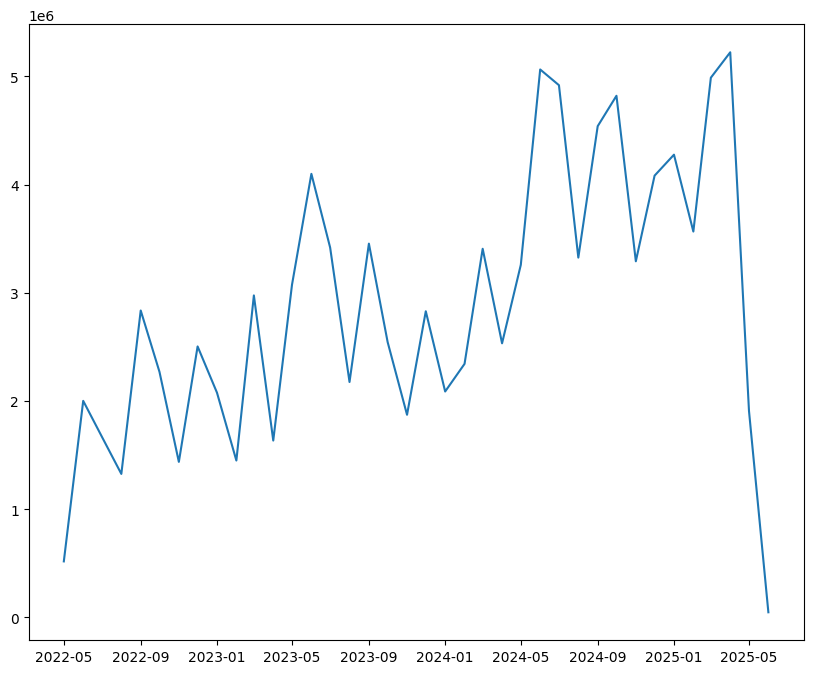

In [7]:
fig ,ax = plt.subplots(figsize=(10,8))
X = simple_df["YearMonth"]
Y = simple_df["Revenue"]
ax.plot(X, Y)